In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
file_path = "../data/clean_data/final.csv"
# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)
df.head(10)

,HDI Rank,Country,Gender Inequality Index Value,Gender Inequality Index Rank,Maternal Mortality Ratio,Adolescent Birth Rate,Women Share of Seats in Parliament,Female Population with Some Secondary Education,Male Population with Some Secondary Education,Female Labour Force Participation Rate,Male Labour Force Participation Rate
0,1.0,Switzerland,0.018,3,5.0,2.2,39.8,96.9,97.5,61.7,72.7
1,2.0,Norway,0.016,2,2.0,2.3,45.0,99.1,99.3,60.3,72.0
2,3.0,Iceland,0.043,8,4.0,5.4,47.6,99.8,99.7,61.7,70.5
3,4.0,"Hong Kong, China (SAR)",0.000,0,0.0,1.6,0.0,77.1,83.4,53.5,65.8
4,5.0,Australia,0.073,19,6.0,8.1,37.9,94.6,94.4,61.1,70.5
5,6.0,Denmark,0.013,1,4.0,1.9,39.7,95.1,95.2,57.7,66.7
6,7.0,Sweden,0.023,4,4.0,3.3,47.0,91.8,92.2,61.7,68.0
7,8.0,Ireland,0.074,21,5.0,5.9,27.3,88.1,86.0,56.5,68.6
8,9.0,Germany,0.073,19,7.0,7.5,34.8,96.1,96.5,56.8,66.0
9,10.0,Netherlands,0.025,5,5.0,2.8,39.1,89.8,92.7,62.4,71.3


In [41]:
df.shape

(195, 11)

In [42]:
df.columns

Index(['HDI Rank', 'Country', 'Gender Inequality Index Value',
       'Gender Inequality Index Rank', 'Maternal Mortality Ratio',
       'Adolescent Birth Rate', 'Women Share of Seats in Parliament',
       'Female Population with Some Secondary Education',
       'Male Population with Some Secondary Education',
       'Female Labour Force Participation Rate',
       'Male Labour Force Participation Rate'],
      dtype='object')

### Some Statistics

In [43]:
print(df.describe())

         HDI Rank  Gender Inequality Index Value  \
count  195.000000                     195.000000   
mean    93.846154                       0.300226   
std     56.402337                       0.217181   
min      0.000000                       0.000000   
25%     45.500000                       0.085500   
50%     91.000000                       0.303000   
75%    141.500000                       0.485500   
max    191.000000                       0.820000   

       Gender Inequality Index Rank  Maternal Mortality Ratio  \
count                    195.000000                192.000000   
mean                      74.430769                135.598958   
std                       54.115370                194.728031   
min                        0.000000                  0.000000   
25%                       23.500000                  9.000000   
50%                       73.000000                 43.000000   
75%                      121.500000                170.000000   
max        

In [44]:
from tabulate import tabulate


summary_stats = df.describe().transpose()
print(tabulate(summary_stats, headers='keys', tablefmt='pretty'))


+-------------------------------------------------+-------+--------------------+---------------------+-----+---------------------+-------+--------+-------+
|                                                 | count |        mean        |         std         | min |         25%         |  50%  |  75%   |  max  |
+-------------------------------------------------+-------+--------------------+---------------------+-----+---------------------+-------+--------+-------+
|                    HDI Rank                     | 195.0 | 93.84615384615384  |  56.40233711503509  | 0.0 |        45.5         | 91.0  | 141.5  | 191.0 |
|          Gender Inequality Index Value          | 195.0 | 0.300225641025641  | 0.21718086044417576 | 0.0 | 0.08549999999999999 | 0.303 | 0.4855 | 0.82  |
|          Gender Inequality Index Rank           | 195.0 | 74.43076923076923  |  54.11537004565737  | 0.0 |        23.5         | 73.0  | 121.5  | 170.0 |
|            Maternal Mortality Ratio             | 192.0 | 135.

### Correlation Heatmap between variables

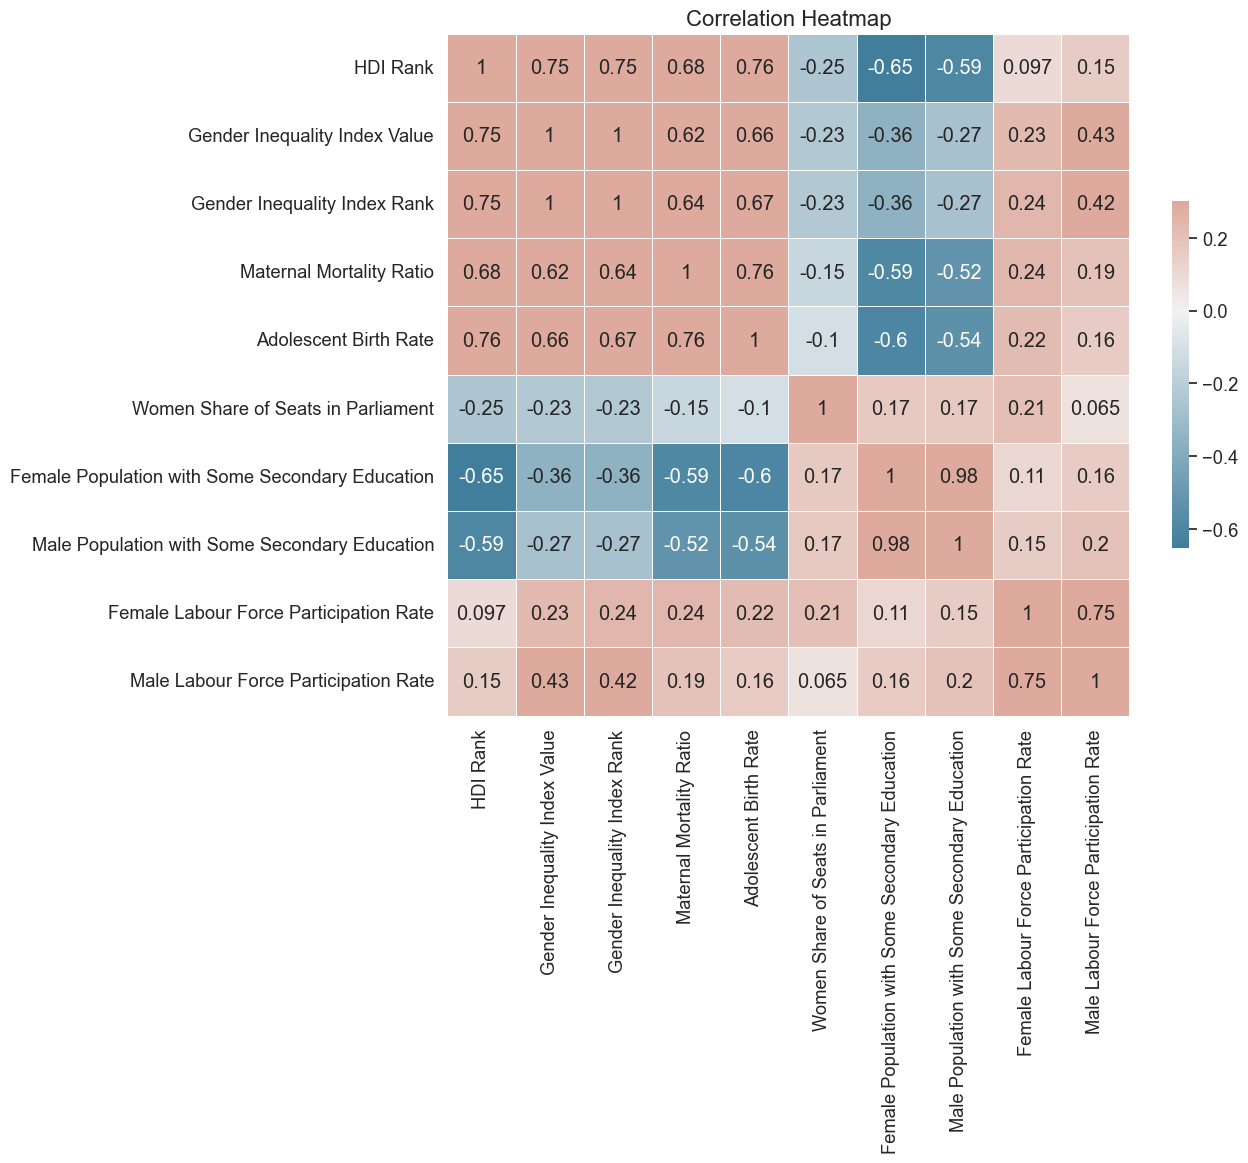

In [45]:
corr = df.corr()
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

### Let's take a look at the distribution of some Key Variables

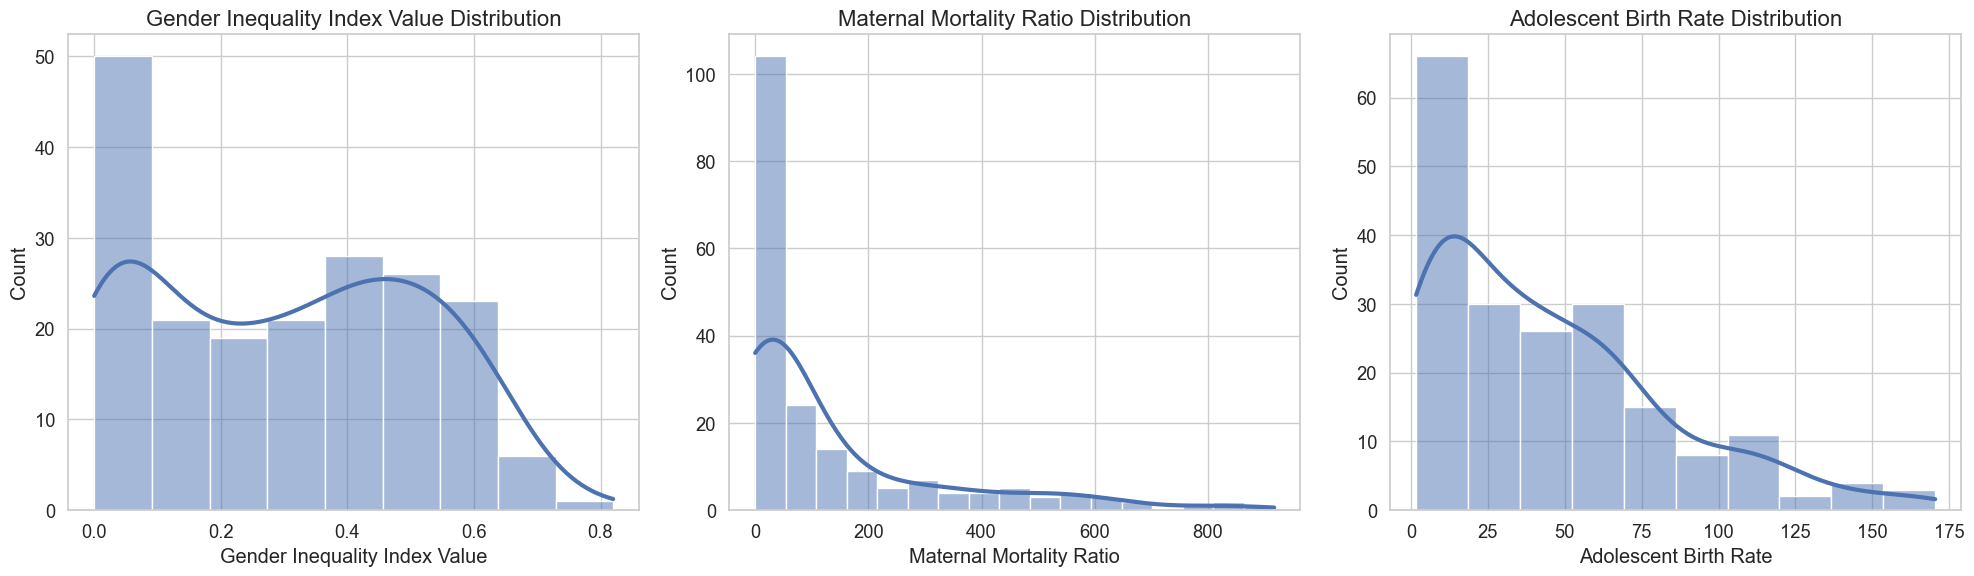

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(df["Gender Inequality Index Value"], kde=True, ax=axes[0], line_kws={"color": "navy", "lw": 3})
axes[0].set_title('Gender Inequality Index Value Distribution', fontsize=16)

sns.histplot(df["Maternal Mortality Ratio"], kde=True, ax=axes[1], line_kws={"color": "navy", "lw": 3})
axes[1].set_title('Maternal Mortality Ratio Distribution', fontsize=16)

sns.histplot(df["Adolescent Birth Rate"], kde=True, ax=axes[2], line_kws={"color": "navy", "lw": 3})
axes[2].set_title('Adolescent Birth Rate Distribution', fontsize=16)

plt.tight_layout()
plt.show()


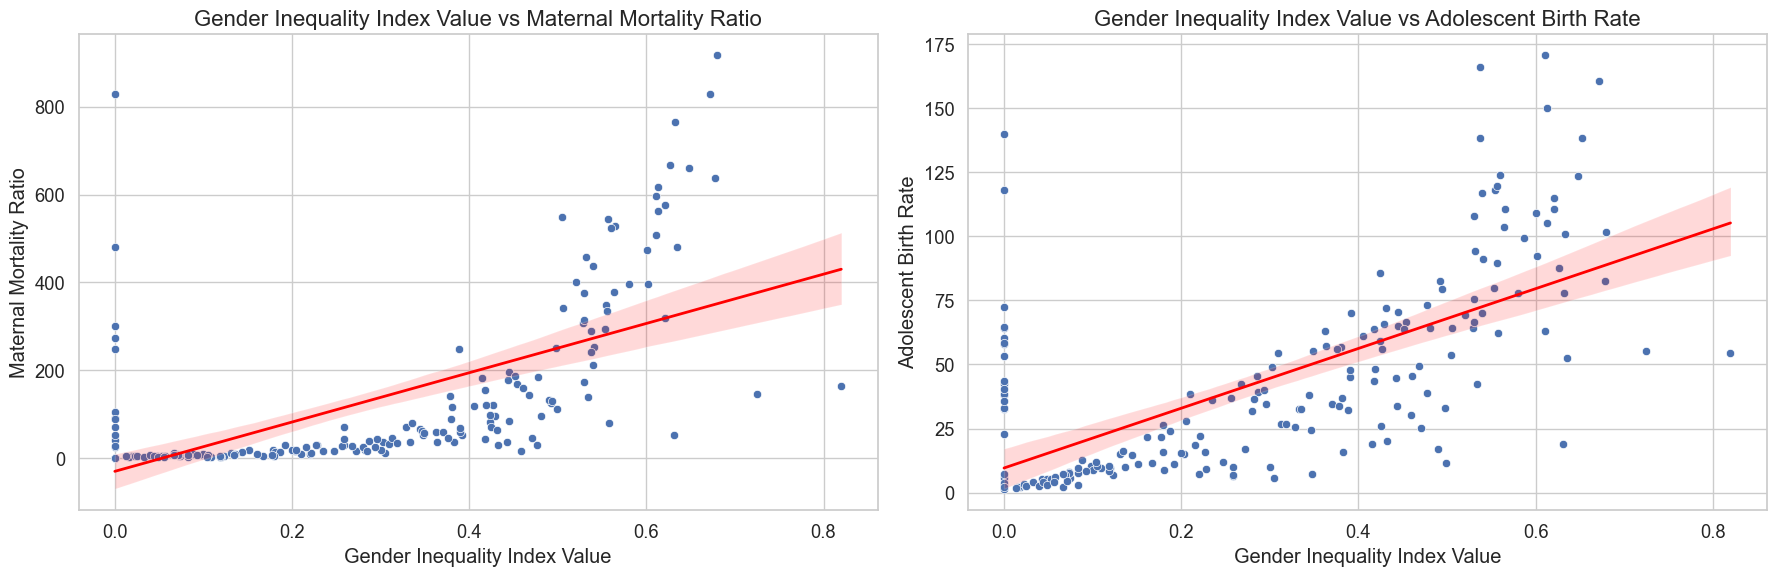

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(data=df, x="Gender Inequality Index Value", y="Maternal Mortality Ratio", ax=axes[0])
sns.regplot(data=df, x="Gender Inequality Index Value", y="Maternal Mortality Ratio", ax=axes[0], scatter=False, color='red', line_kws={"lw": 2})
axes[0].set_title('Gender Inequality Index Value vs Maternal Mortality Ratio', fontsize=16)

sns.scatterplot(data=df, x="Gender Inequality Index Value", y="Adolescent Birth Rate", ax=axes[1])
sns.regplot(data=df, x="Gender Inequality Index Value", y="Adolescent Birth Rate", ax=axes[1], scatter=False, color='red', line_kws={"lw": 2})
axes[1].set_title('Gender Inequality Index Value vs Adolescent Birth Rate', fontsize=16)

plt.tight_layout()
plt.show()


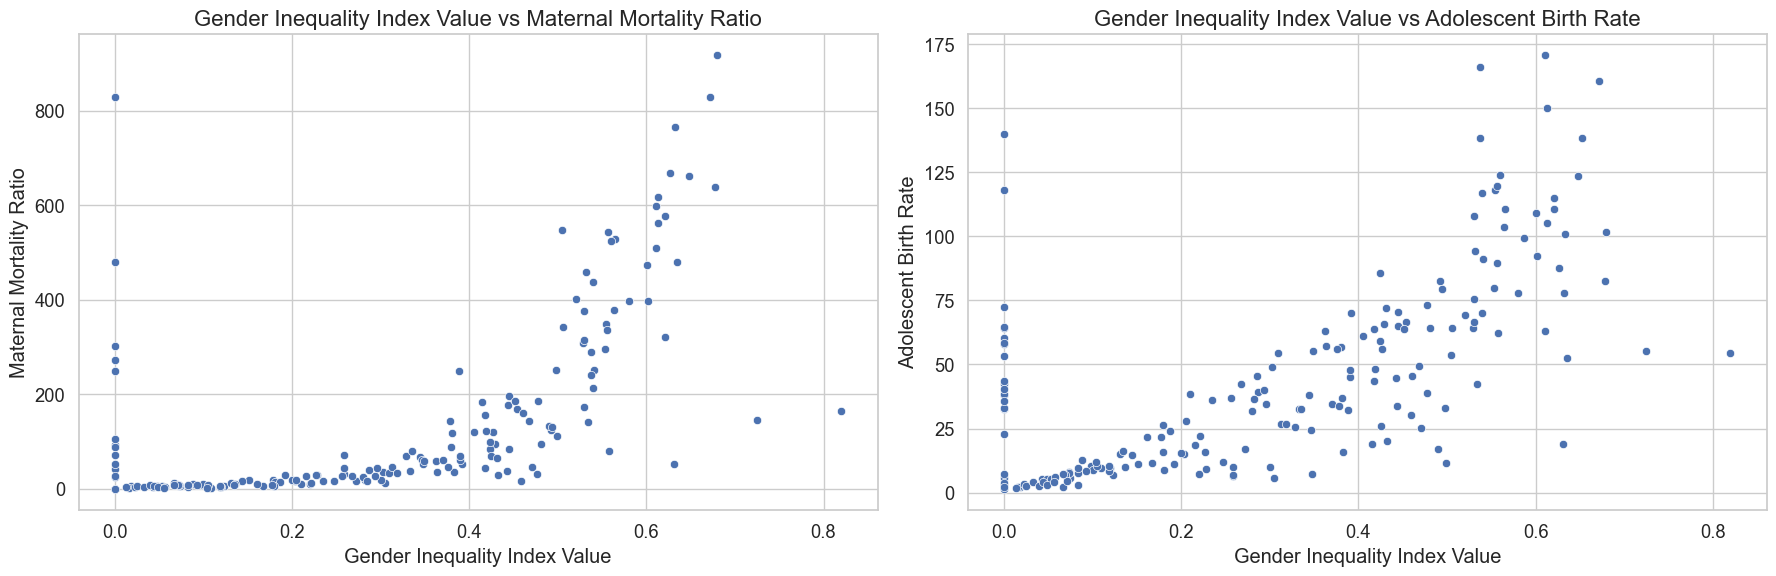

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(data=df, x="Gender Inequality Index Value", y="Maternal Mortality Ratio", ax=axes[0])
axes[0].set_title('Gender Inequality Index Value vs Maternal Mortality Ratio', fontsize=16)

sns.scatterplot(data=df, x="Gender Inequality Index Value", y="Adolescent Birth Rate", ax=axes[1])
axes[1].set_title('Gender Inequality Index Value vs Adolescent Birth Rate', fontsize=16)

plt.tight_layout()
plt.show()


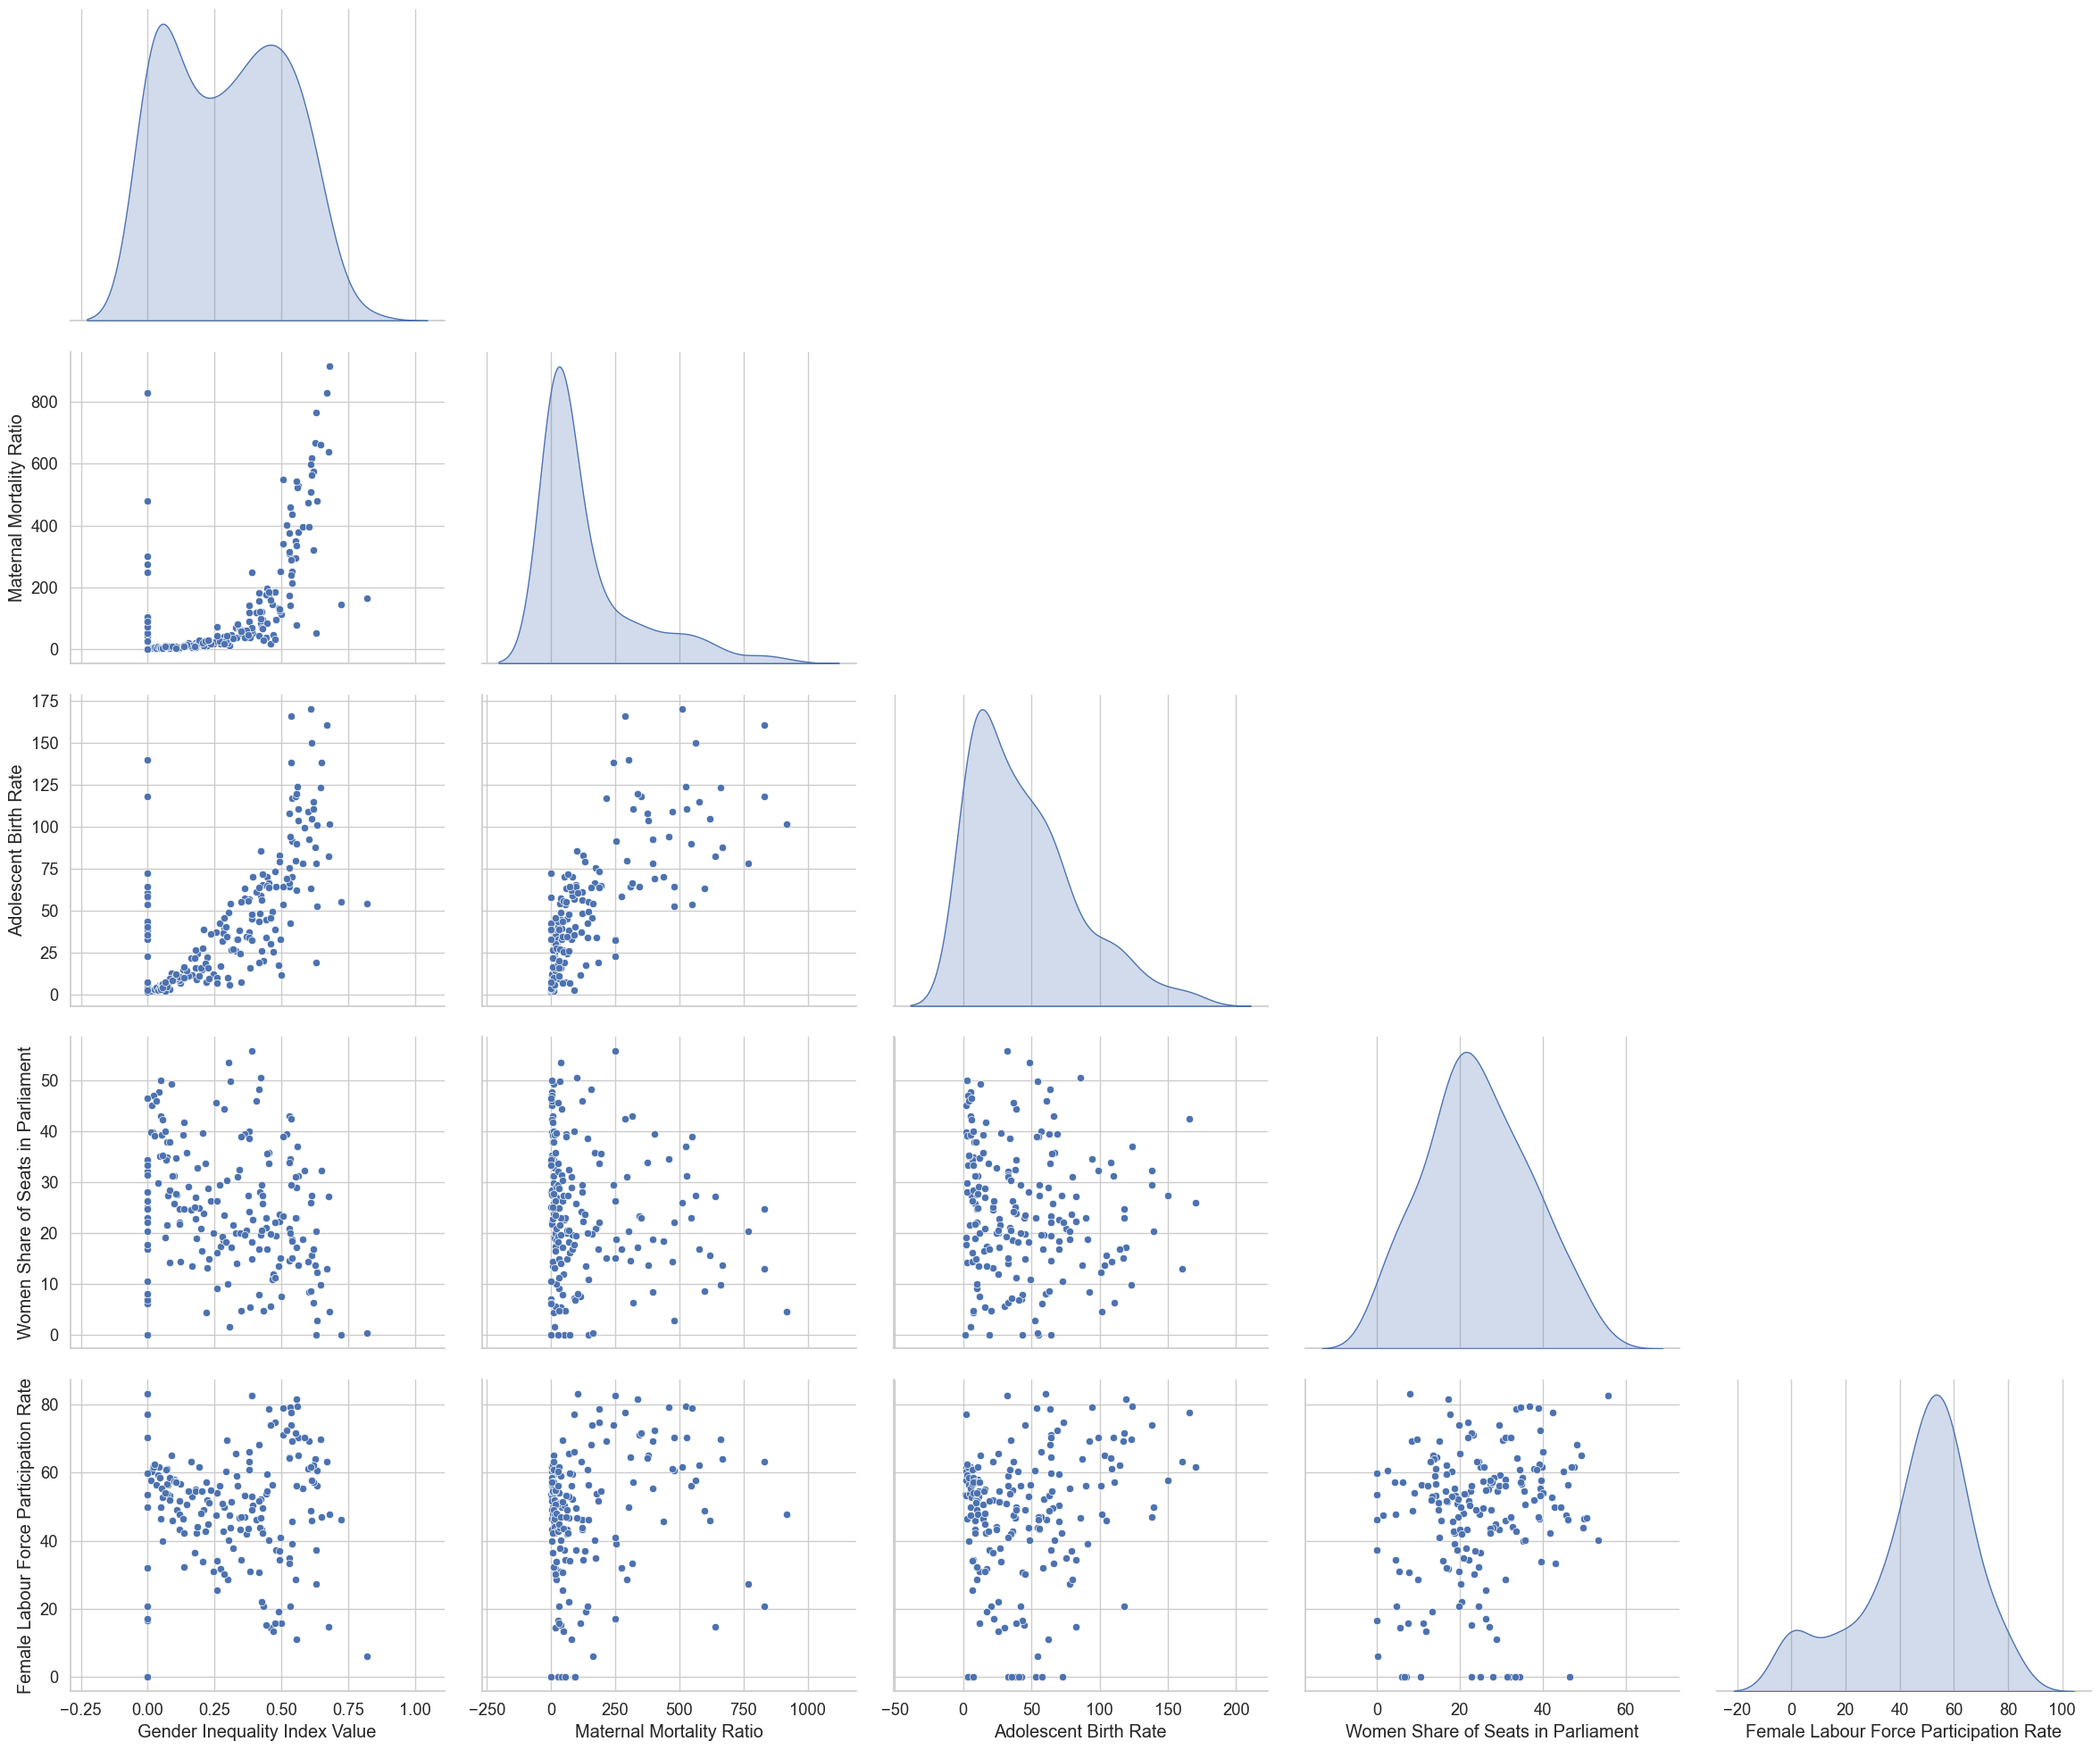

In [49]:
sns.set(font_scale=1.2, style="whitegrid")
key_vars = ['Gender Inequality Index Value', 'Maternal Mortality Ratio', 'Adolescent Birth Rate', 'Women Share of Seats in Parliament', 'Female Labour Force Participation Rate']
pairplot = sns.pairplot(df[key_vars], diag_kind='kde', corner=True, height=4, aspect=1.2)

pairplot.fig.subplots_adjust(hspace=0.1, wspace=0.1)

plt.show()



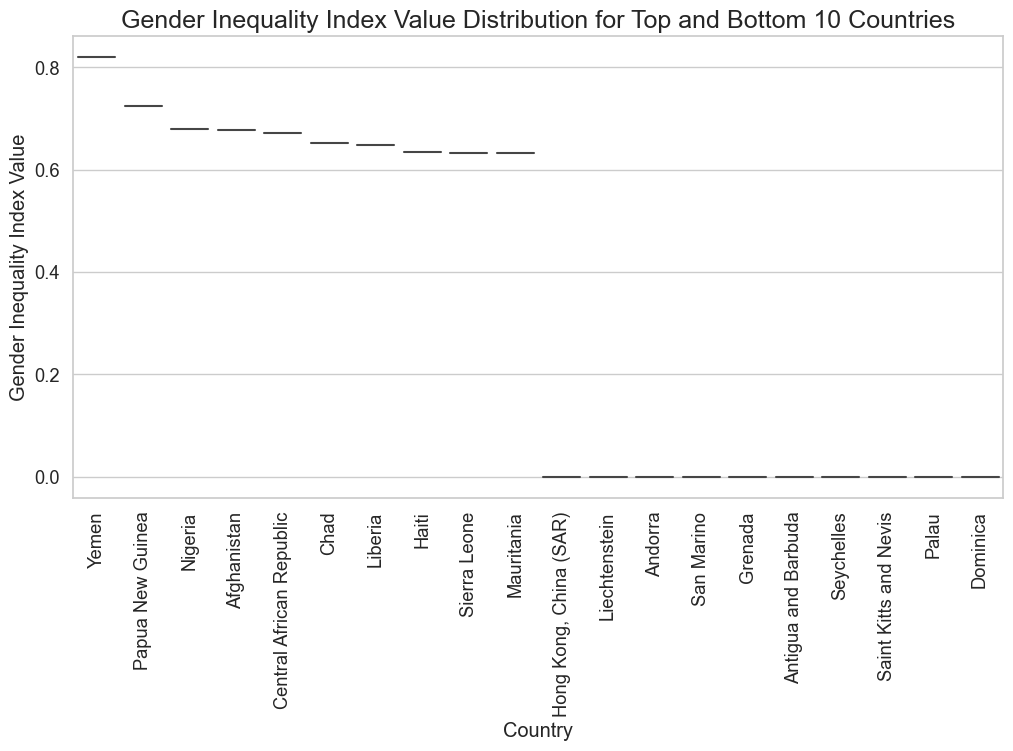

In [50]:
top_10_countries = df.nlargest(10, "Gender Inequality Index Value")
bottom_10_countries = df.nsmallest(10, "Gender Inequality Index Value")
selected_countries = pd.concat([top_10_countries, bottom_10_countries])

plt.figure(figsize=(12, 6))
sns.set(font_scale=1.2, style="whitegrid")
sns.violinplot(data=selected_countries, x='Country', y='Gender Inequality Index Value')
plt.xticks(rotation=90)
plt.title('Gender Inequality Index Value Distribution for Top and Bottom 10 Countries', fontsize=18)
plt.show()


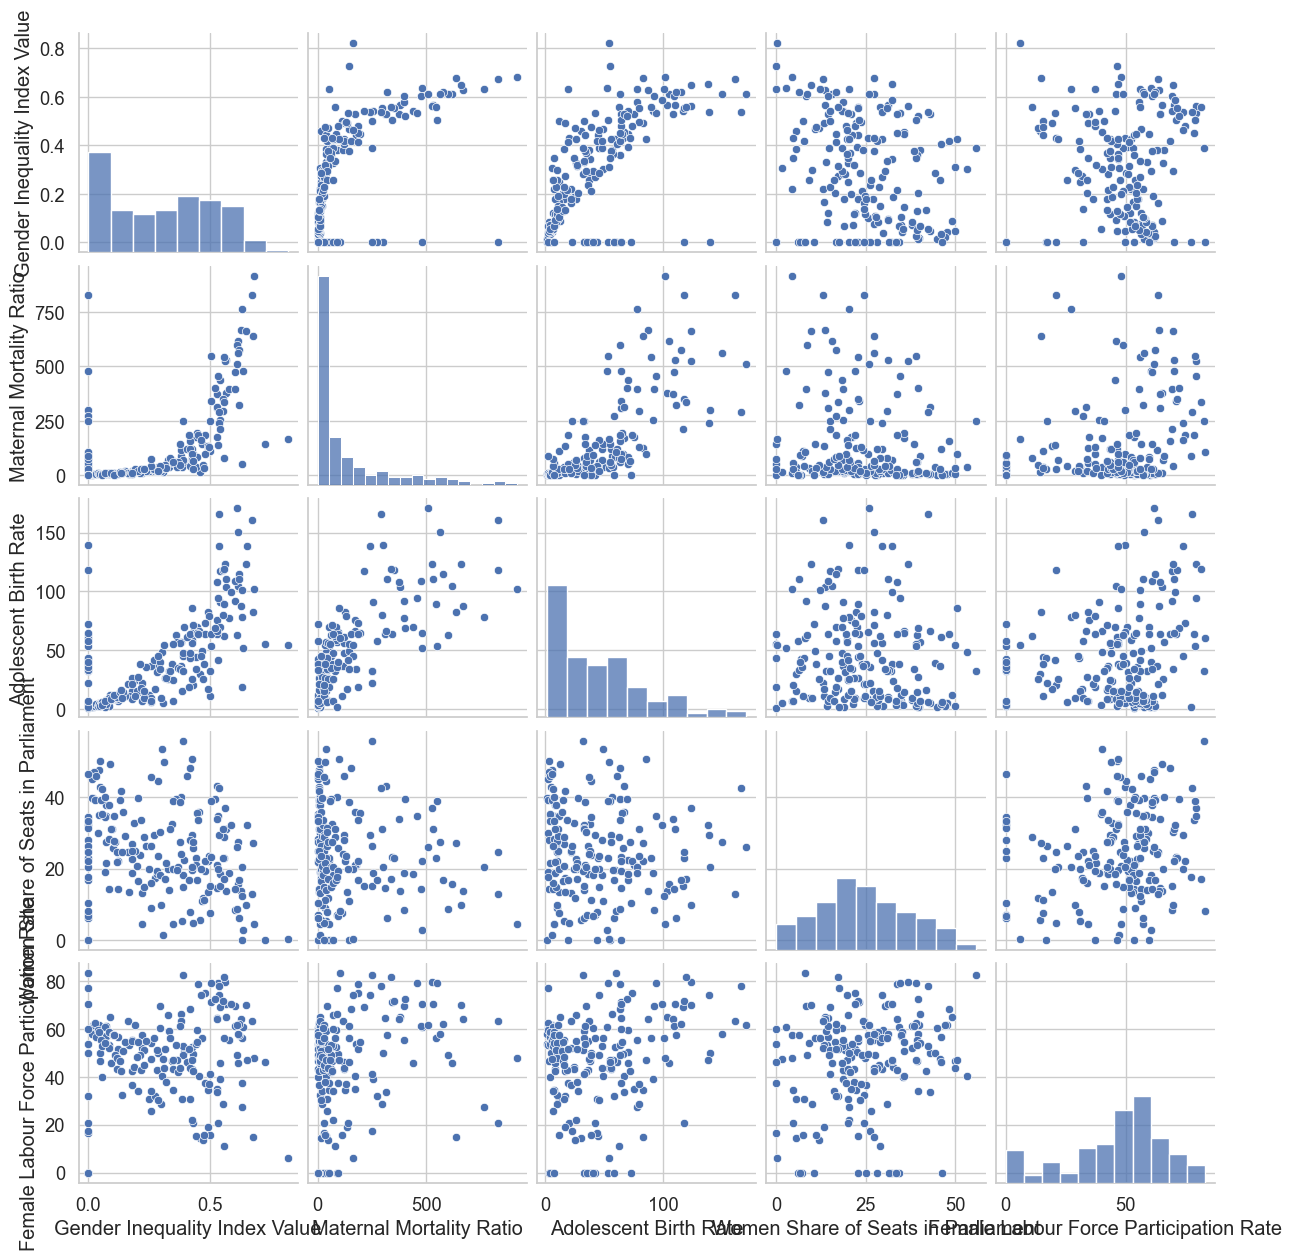

In [51]:
key_vars = ['Gender Inequality Index Value', 'Maternal Mortality Ratio', 'Adolescent Birth Rate', 'Women Share of Seats in Parliament', 'Female Labour Force Participation Rate']
sns.pairplot(df[key_vars])
plt.show()
